## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
x = np.linspace(1, 20, 50)
x

array([ 1.        ,  1.3877551 ,  1.7755102 ,  2.16326531,  2.55102041,
        2.93877551,  3.32653061,  3.71428571,  4.10204082,  4.48979592,
        4.87755102,  5.26530612,  5.65306122,  6.04081633,  6.42857143,
        6.81632653,  7.20408163,  7.59183673,  7.97959184,  8.36734694,
        8.75510204,  9.14285714,  9.53061224,  9.91836735, 10.30612245,
       10.69387755, 11.08163265, 11.46938776, 11.85714286, 12.24489796,
       12.63265306, 13.02040816, 13.40816327, 13.79591837, 14.18367347,
       14.57142857, 14.95918367, 15.34693878, 15.73469388, 16.12244898,
       16.51020408, 16.89795918, 17.28571429, 17.67346939, 18.06122449,
       18.44897959, 18.83673469, 19.2244898 , 19.6122449 , 20.        ])

In [4]:
a = -2
b = 1
y = a*x + b
y

array([ -1.        ,  -1.7755102 ,  -2.55102041,  -3.32653061,
        -4.10204082,  -4.87755102,  -5.65306122,  -6.42857143,
        -7.20408163,  -7.97959184,  -8.75510204,  -9.53061224,
       -10.30612245, -11.08163265, -11.85714286, -12.63265306,
       -13.40816327, -14.18367347, -14.95918367, -15.73469388,
       -16.51020408, -17.28571429, -18.06122449, -18.83673469,
       -19.6122449 , -20.3877551 , -21.16326531, -21.93877551,
       -22.71428571, -23.48979592, -24.26530612, -25.04081633,
       -25.81632653, -26.59183673, -27.36734694, -28.14285714,
       -28.91836735, -29.69387755, -30.46938776, -31.24489796,
       -32.02040816, -32.79591837, -33.57142857, -34.34693878,
       -35.12244898, -35.89795918, -36.67346939, -37.44897959,
       -38.2244898 , -39.        ])

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [21]:
def fit (X,Y,L,N):     ## L: learning rate, N: max. #iterations
    theta0 = 0
    theta1 = 0
    n = len(X) ## n: no. of rows/observations
    lossFunc = []
    Theta_0 = []
    Theta_1 = []
    hypothesis = []
     
    for i in range(N):
        Y_pred = theta0 + theta1*X
        cost = (1/2*n)*np.sum((Y-Y_pred)**2)
        lossFunc.append(cost)
        hypothesis.append(Y_pred)
        Theta_0.append(theta0)
        Theta_1.append(theta1)
        D_theta0 = (-1/n) * np.sum(Y - Y_pred) # dervative wrt theta0
        D_theta1 = (-1/n) * np.sum(X * (Y - Y_pred)) # dervative wrt theta1
        theta0 = theta0 - L * D_theta0 # update theta0
        theta1 = theta1 - L * D_theta1 # update theta1
    Y_pred = theta0 + theta1*X
   
    lossFunc = np.array(lossFunc)
    return Theta_0, Theta_1, lossFunc, hypothesis, Y_pred, theta0, theta1


#### Try your function with any input parameterss of your choice.

In [41]:
Theta_0, Theta_1, loss, hypothesis, y_pred, theta0, theta1 = fit(x,y,0.01,10000)

#### Calculate r2 score

In [42]:
r2_score(y,y_pred)

1.0

In [43]:
theta0

0.9999999996881521

In [44]:
theta1

-1.9999999999768334

#### Plot loss vs. epochs

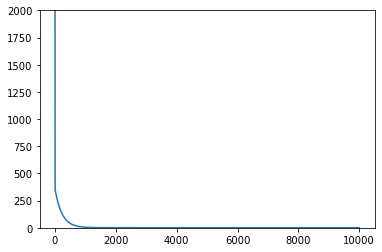

In [45]:
plt.plot(loss)
plt.ylim(-1,2000)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

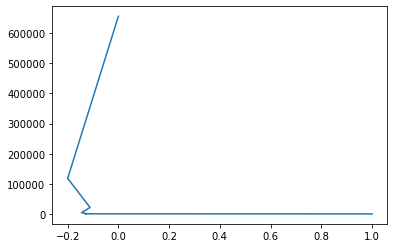

In [46]:
plt.plot(Theta_0, loss)
plt.show()

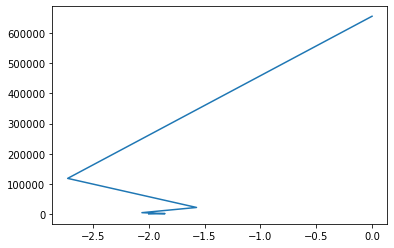

In [47]:
plt.plot(Theta_1, loss)
plt.show()

#### Plot all regression lines till converge

In [48]:
hypothesis = np.array(hypothesis)
hypothesis

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -2.92622449,  -3.98333195,  -5.0404394 , ..., -52.61027489,
        -53.66738234, -54.7244898 ],
       [ -1.68391864,  -2.29353643,  -2.90315423, ..., -30.33595503,
        -30.94557282, -31.55519062],
       ...,
       [ -1.        ,  -1.7755102 ,  -2.55102041, ..., -37.44897959,
        -38.2244898 , -39.        ],
       [ -1.        ,  -1.7755102 ,  -2.55102041, ..., -37.44897959,
        -38.2244898 , -39.        ],
       [ -1.        ,  -1.7755102 ,  -2.55102041, ..., -37.44897959,
        -38.2244898 , -39.        ]])

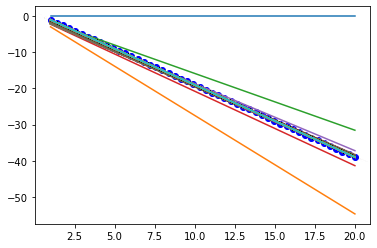

In [49]:
plt.plot(x,hypothesis.T)
plt.scatter(x,y, color = 'blue')
plt.show()

#### Plot the best regression line

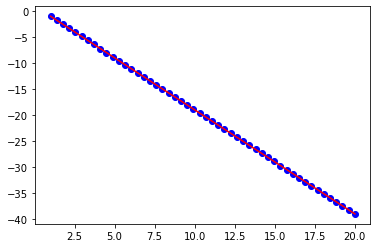

In [50]:
plt.scatter(x,y, color = 'blue')
plt.plot(x,y_pred, color = 'red')
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [51]:
Theta_01, Theta_11, loss1, hypothesis1, y_pred1, theta01, theta11 = fit(x,y,0.001,100)

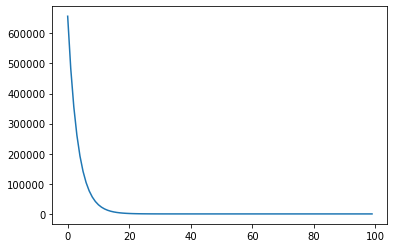

In [53]:
plt.plot(loss1)
#plt.ylim(-1,2000)
plt.show()

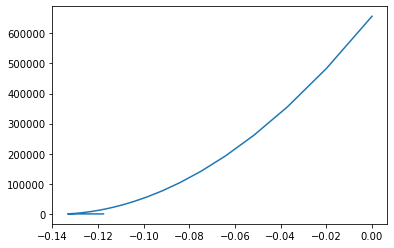

In [54]:
plt.plot(Theta_01, loss1)
plt.show()

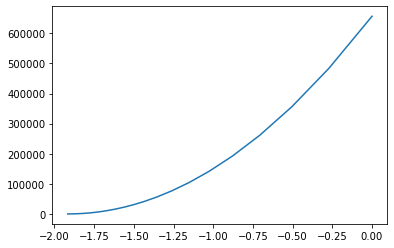

In [55]:
plt.plot(Theta_11, loss1)
plt.show()

In [56]:
hypothesis = np.array(hypothesis)
hypothesis

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -2.92622449,  -3.98333195,  -5.0404394 , ..., -52.61027489,
        -53.66738234, -54.7244898 ],
       [ -1.68391864,  -2.29353643,  -2.90315423, ..., -30.33595503,
        -30.94557282, -31.55519062],
       ...,
       [ -1.        ,  -1.7755102 ,  -2.55102041, ..., -37.44897959,
        -38.2244898 , -39.        ],
       [ -1.        ,  -1.7755102 ,  -2.55102041, ..., -37.44897959,
        -38.2244898 , -39.        ],
       [ -1.        ,  -1.7755102 ,  -2.55102041, ..., -37.44897959,
        -38.2244898 , -39.        ]])

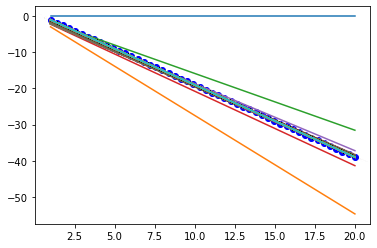

In [57]:
plt.plot(x,hypothesis.T)
plt.scatter(x,y, color = 'blue')
plt.show()

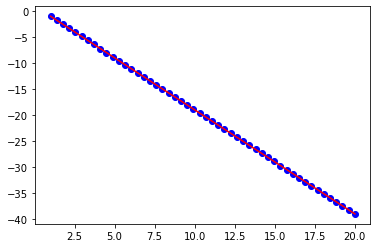

In [58]:
plt.scatter(x,y, color = 'blue')
plt.plot(x,y_pred, color = 'red')
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations

#### Change batch size and see the effect

In [10]:
def mini_batch (X,Y,L,N,B):     ## L: learning rate, N: max. #iterations
    theta0 = 0
    theta1 = 0
    n = B ## n: no. of rows/observations
    lossFunc = []
    Theta_0 = []
    Theta_1 = []
    hypothesis = []
    #loss_mini = []
     
    for i in range(N):
        for j in range(0,len(X),B):
            
            Y_pred = theta0 + theta1*X[j:j+B]
            #print(Y_pred)
            
            cost = (1/2*n)*np.sum((Y[j:j+B]-Y_pred)**2)
            lossFunc.append(cost)
            hypothesis.append(Y_pred)
            Theta_0.append(theta0)
            Theta_1.append(theta1)
            D_theta0 = (-1/n) * np.sum(Y[j:j+B] - Y_pred) # dervative wrt theta0
            D_theta1 = (-1/n) * np.sum(X[j:j+B] * (Y[j:j+B] - Y_pred)) # dervative wrt theta1
            theta0 = theta0 - L * D_theta0 # update theta0
            theta1 = theta1 - L * D_theta1 # update theta1
        
        
    Y_pred = theta0 + theta1*X
   
    lossFunc = np.array(lossFunc)
    return Theta_0, Theta_1, lossFunc, hypothesis, Y_pred, theta0, theta1
t0,t1,l,h,yp,thetam0,thetam1=mini_batch(x,y,0.01,1000,10)


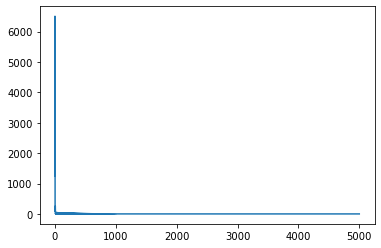

In [11]:
plt.plot(l)
plt.show()

In [12]:
print(len(l))
print(thetam0,thetam1)

5000
0.9993096427095601 -1.99994747316595


In [13]:
r2_score(y,yp)

0.9999999991563542

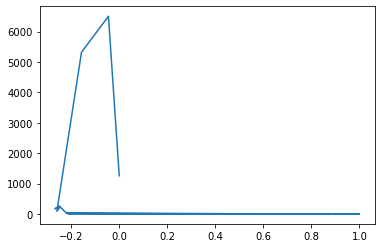

In [14]:
plt.plot(t0,l)
plt.show()

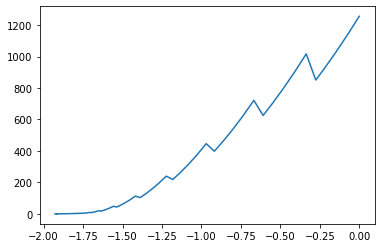

In [178]:
plt.plot(t1,l)
plt.show()

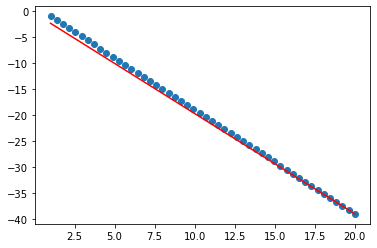

In [179]:
plt.scatter(x,y)
plt.plot(x,yp, color ='red')
plt.show()

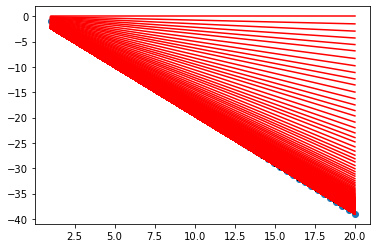

In [180]:
plt.scatter(x,y)
for i in range(len(t0)):
    ym_pred = t0[i] + t1[i]*x
    plt.plot(x,ym_pred, color = 'red')
    

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [190]:
def stochastic(x,y,L,epoch):
    theta_0 = 0
    theta_1 = 0
    hyp = []
    loss = []
    lossepoch =[]
    Theta_0 = []
    Theta_1 = []
    n = len(x)
    for i in range(epoch):
        for j in range(len(x)):
            Theta_0.append(theta_0)
            Theta_1.append(theta_1)
            hx = theta_0 + theta_1 * x[j]
            hyp.append(hx)
            error = (y[j] - hx)**2
            loss.append(error)
            D_theta0 = (-1/n) * (y[j] - hx) # dervative wrt theta0
            D_theta1 = (-1/n) * (y[j] - hx) * x[j] # dervative wrt theta1
            theta_0 = theta_0 - L * D_theta0 # update theta0
            theta_1 = theta_1 - L * D_theta1 # update theta1
        lossepoch.append(error)
    hx = theta_0 + theta_1 * x
    return hyp, loss, lossepoch, Theta_0, Theta_1, hx, theta_0, theta_1

hyp, loss_S, lossepoch, Theta_s0, Theta_s1, hx, ts0, ts1 = stochastic(x,y,0.001,10000)

In [191]:
r2_score(y,hx)
print(ts0)
print(ts1)

0.873312207902324
-1.9907248000561661


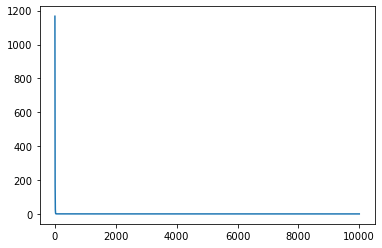

In [192]:
plt.plot(lossepoch)
#plt.ylim(-1,2000)
plt.show()

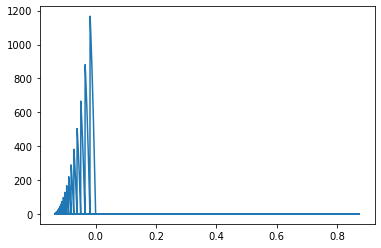

In [193]:
plt.plot(Theta_s0, loss_S)
plt.show()

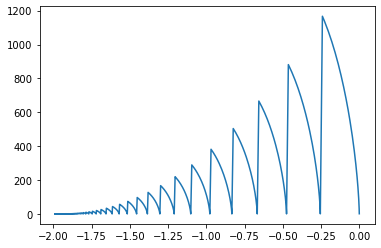

In [194]:
plt.plot(Theta_s1, loss_S)
plt.show()

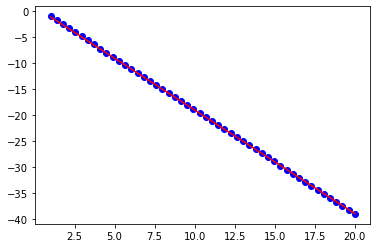

In [196]:
plt.plot(x,hx, color ='red')
plt.scatter(x,y, color = 'blue')
plt.show()

In [197]:
print(ts0,ts1)

0.873312207902324 -1.9907248000561661
